<font color='red'>

Grade: A

Great Job! I found no errors.

Problem 1: Good.

Problem 2: Good.

Problem 3: Good.

# Programming HW 3

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
%matplotlib inline

## Problem 1

**Copier maintenance**. The Tri-City Office Equipment Corporation sells an imported copier on a franchise basis and performs preventive maintenance and repair service on this copier. The data below have been collected from 45 recent calls on users to perform routine preventive maintenance service; for each call, $x$ is the number of copiers serviced and $y$ is the total number of minutes spent by the service person. The data look like:

| i | 1 | 2 | 3 |...| 43 | 44 | 45 |
|---|---|---|---|---|---|---|---|
|$x_i$| 2 | 4 | 3 | ... | 2 | 4 | 5|
| $y_i$ | 20 | 60 | 46 | ... | 27 | 61| 77|

The full data are stored in "copier.txt".

1. What are the alternative conclusions when testing for lack of fit of a linear regression function?

2. Perform the test indicated in part (1). Control the risk of Type I error at $0.05$. State the decision rule and conclusion.

In [20]:
print('Problem 1 a')
print()

print('H_0: E[y] = β0 + β1x')
print('H_a: E[y] ≠ β0 + β1x')
print()
print('if Fstar<=sp.stats.f.ppf(1-alpha,c-2, n-c),Conclude H_0'); 
print('if Fstar>sp.stats.f.ppf(1-alpha,c-2, n-c),Conclude H_1'); 

print()
print()

print('Problem 1 b')
print()
data= np.loadtxt('copier.txt')
x=data[:, 1]
y=data[:, 0]
n=x.size

df = pd.DataFrame({'MinX':x, 'NewY':y})
df_mean = df.groupby('MinX').mean()
print('Average the data based on x and it now looks like:','\n',df_mean)
c=10
print()
SSEF=0
for index, row in df.iterrows():
    SSEF+=(row['NewY']-df_mean.iloc[df_mean.index == row['MinX']].values[0][0])**2
print('SSPE (SSE(F)) =', SSEF)
print()
x1 = sm.add_constant(x)
results = sm.OLS(y, x1).fit()
b0 = results.params[0]
b1 = results.params[1]
y_hat = b0 + b1*x

SSER=np.sum((y-y_hat)**2)
print('SSPE (R) =', SSER)
print()
dfR=n-2
dfF=n-c

Fstar = ((SSER-SSEF)/(dfR-dfF))/((SSEF)/(dfF))
print('F* =', Fstar)
alpha =0.05
print('F(1-alpha; c-2, n-c) =', sp.stats.f.ppf(1-alpha,c-2, n-c))
print()
if Fstar<=sp.stats.f.ppf(1-alpha,c-2, n-c):
     print('Conclude H0:that regression function is linear'); 
elif(abs(tt)>sp.stats.t.ppf(0.995,n-2)):
    print('Conclude Ha:that regression function is not linear');

Problem 1 a

H_0: E[y] = β0 + β1x
H_a: E[y] ≠ β0 + β1x

if Fstar<=sp.stats.f.ppf(1-alpha,c-2, n-c),Conclude H_0
if Fstar>sp.stats.f.ppf(1-alpha,c-2, n-c),Conclude H_1


Problem 1 b

Average the data based on x and it now looks like: 
             NewY
MinX            
1.0    11.500000
2.0    27.500000
3.0    41.000000
4.0    61.400000
5.0    77.875000
6.0    94.500000
7.0   108.333333
8.0   118.000000
9.0   135.250000
10.0  140.000000

SSPE (SSE(F)) = 2797.6583333333333

SSPE (R) = 3416.3770234986955

F* = 0.9675571306265512
F(1-alpha; c-2, n-c) = 2.216675032675201

Conclude H0:that regression function is linear


## Problem 2

**Production time**. In a manufacturing study, the production times for $111$ recent production runs were obtained. The table below lists for each run the production time in hours ($y$) and the production lot size ($x$).

| i | 1 | 2 | 3 |...| 109 | 110 | 111 |
|---|---|---|---|---|---|---|---|
|$x_i$| 15 | 9 | 7 | ... | 12 | 9 | 15|
| $y_i$ | 14.28 | 8.80 | 12.49 | ... | 16.37 | 11.45| 15.78|

The full data are in "production.txt".

1. Prepare a scatter plot of the data. Does a linear relation appear adequate here?

2. Use the transformation $x' = \sqrt{x}$ and obtain the estimated linear regression function for the transformed data.

3. Plot the estimated regression line and the transformed data. Does the regression line appear to be a good fit to the transformed data?

4. Obtain the residuals and plot them against the fitted values. Also prepare a normal probability plot. What do your plots show?

Problem 2 a

There is no linear relation appear adequate here
b0= 6.863486913347429
b1= 0.5332749228355271


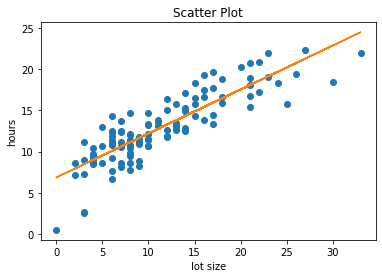



Problem 2 b

b0= 1.2546965953530318
b1= 3.6235202773528354


Problem 2 c

the regression line appears to be a good fit to the transformed data


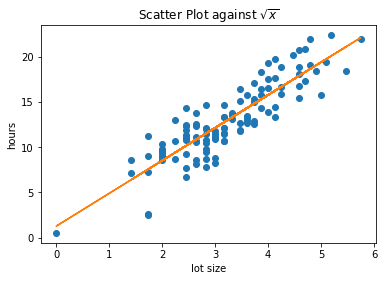



Problem 2 d



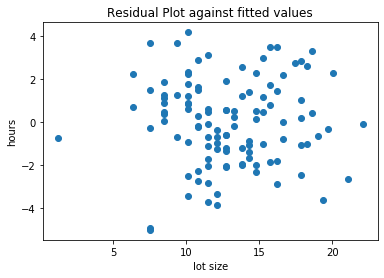

Text(0.5, 1.0, 'normal probability plot')

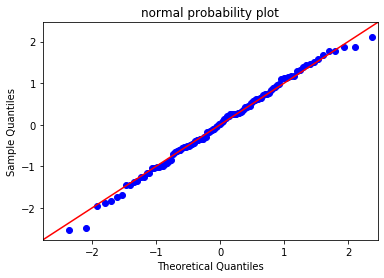

In [21]:
print('Problem 2 a')
print()
data= np.loadtxt('production.txt')
x=data[:, 1]
y=data[:, 0]
plt.plot(x, y,'o')
plt.xlabel('lot size')
plt.ylabel('hours')
plt.title('Scatter Plot')
print('There is no linear relation appear adequate here')

x_1 = sm.add_constant(x)
results=sm.OLS(y,x_1).fit()
b0 = results.params[0]
b1 = results.params[1]
print('b0=', b0)
print('b1=', b1)
y_hat = b0 + b1*x
plt.plot(x, y_hat,label='regression line')
plt.show()
print()
print()

print('Problem 2 b')
print()
sqrtx= np.sqrt(x)
sqrtx_1 = sm.add_constant(sqrtx)
results=sm.OLS(y,sqrtx_1).fit()
b0 = results.params[0]
b1 = results.params[1]
print('b0=', b0)
print('b1=', b1)
y_hat = b0 + b1*sqrtx
print()
print()

print('Problem 2 c')
print()
plt.plot(sqrtx, y,'o')
plt.plot(sqrtx, y_hat,label='regression line')
plt.xlabel('lot size')
plt.ylabel('hours')
plt.title('Scatter Plot against $\sqrt{x}$')
print('the regression line appears to be a good fit to the transformed data')
plt.show()
print()
print()

print('Problem 2 d')
print()
x_1 = sm.add_constant(sqrtx)
results=sm.OLS(y,x_1).fit()
b0 = results.params[0]
b1 = results.params[1]
y_hat = b0 + b1*sqrtx
res=results.resid
plt.plot(y_hat,res,'o')
plt.xlabel('lot size')
plt.ylabel('hours')
plt.title('Residual Plot against fitted values')
plt.show()

fig=sm.qqplot(res, fit=True, line='45')
plt.title('normal probability plot')

## Problem 3

**Consumer finance**. The data below show, for a consumer finance company operating in six cities, the number of competing loan companies operating in the city ($x$) and the number per thousand of the company's loans made in that city that are currently delinquent ($y$):

| i | 1 | 2 | 3 | 4 | 5 | 6 |
|---|---|---|---|---|---|---|
|$x_i$| 4 | 1 | 2 | 3 | 3 | 4 |
| $y_i$ | 16 | 5 | 10 | 15 | 13 | 22|

Assume normal error regresson model is applicable. 

1. Using matrix methods, find 

(a) $\mathbf{y}^T\mathbf{y}$

(b) $X^TX$

(c) $X^T\mathbf{y}$.

2. Using matrix methods, obtain 

(a) vector of estimated regression coefficients

(b) vector of residuals

(c) SSR

(d) SSE

(e) estimated variance-covariance matrix of $\mathbf{b}$

(f) point estimate of $E[y_h]$ when $x_h=4$

(g) $s^2[\text{pred}]$ when $x_h=4$

3. From your estimated variance-covariance matrix in Part (2e), obtain the following:

(a) $s[b_0, b_1]$

(b) $s^2[b_0]$

(c) $s[b_1]$

4. Find the hat matrix $H$.

5. Find $s^2[\mathbf{e}]$.

(Hint: use np.eye to generate identity matrix, and use np.ones to generate the matrix of all ones. Check their webpages for their uses.)

In [28]:
x=np.array([4,1,2,3,3,4])
y=np.array([16,5,10,15,13,22])
n=x.size

print('Problem 3, 1')

print('(a)')
print('𝐲𝑇*𝐲=',np.dot(y.T,y))
print()

print('(b)')
col_1 = np.ones(n,)
X = np.column_stack((col_1,x))
print('X^T*X=','\n',np.dot(X.T,X))
print()

print('(c)')
print('$X^T*y$=',np.dot(X.T,y))
print()
print()

print('Problem 3, 2')
print('(a)')
inverse=np.linalg.inv(np.dot(X.T,X))
b=np.dot(inverse,np.dot(X.T,y))
print('The b vector is : ', b)
print()

print('(b)')
e=y-np.dot(X,b)
print('e=: ', e)
print()

print('(c)')
j = (n,n)
Y=np.dot(np.ones(j),y)
SSR=np.dot(b,np.dot(X.T,y))-(np.dot(y.T,Y))/n
print('SSR = ', SSR)
print()

print('(d)')
SSE=np.dot(y,y)-np.dot(b,np.dot(X.T,y))
print('SSE = ', SSE)
print()

print('(e)')
x1=sm.add_constant(x)
results=sm.OLS(y,x1).fit()
MSE=results.mse_resid
s2_b = MSE*np.linalg.inv(np.dot(X.T, X))
print('s2_b0 and s2_b1 from OLS is:','\n', s2_b)
print()

print('(f)')
x_h=np.array([1, 4])
y_hat=np.dot(x_h,b)
print('E[y]:', y_hat)
print()

print('(g)')
s2_y_hat_h=np.dot(x_h,np.dot(s2_b,x_h))+MSE
print('𝑠2[pred]  when 𝑥ℎ=4:', s2_y_hat_h)
print()
print()

print('Problem 3, 3')
print('(a)')
print('𝑠[𝑏0,𝑏1]=',s2_b[0,1])
print()

print('(b)')
print('𝑠2[𝑏0]=', s2_b [0,0])
print()

print('(c)')
print('𝑠[𝑏1]=',  np.sqrt(s2_b [1,1]))
print()
print()

print('Problem 3, 4')
print()
a=np.dot(inverse,X.T)
H=np.dot(X,a)
print('H=',H)
print()
print()

print('Problem 3, 5')
print()
print('s2[e]=',MSE*(1-H))

Problem 3, 1
(a)
𝐲𝑇*𝐲= 1259

(b)
X^T*X= 
 [[ 6. 17.]
 [17. 55.]]

(c)
$X^T*y$= [ 81. 261.]


Problem 3, 2
(a)
The b vector is :  [0.43902439 4.6097561 ]

(b)
e=:  [-2.87804878 -0.04878049  0.34146341  0.73170732 -1.26829268  3.12195122]

(c)
SSR =  145.20731707317054

(d)
SSE =  20.292682926829457

(e)
s2_b0 and s2_b1 from OLS is: 
 [[ 6.80547293 -2.10350982]
 [-2.10350982  0.74241523]]

(f)
E[y]: 18.878048780487802

(g)
𝑠2[pred]  when 𝑥ℎ=4: 6.929208804283163


Problem 3, 3
(a)
𝑠[𝑏0,𝑏1]= -2.10350981558596

(b)
𝑠2[𝑏0]= 6.805472932778105

(c)
𝑠[𝑏1]= 0.8616352064710092


Problem 3, 4

H= [[ 0.36585366 -0.14634146  0.02439024  0.19512195  0.19512195  0.36585366]
 [-0.14634146  0.65853659  0.3902439   0.12195122  0.12195122 -0.14634146]
 [ 0.02439024  0.3902439   0.26829268  0.14634146  0.14634146  0.02439024]
 [ 0.19512195  0.12195122  0.14634146  0.17073171  0.17073171  0.19512195]
 [ 0.19512195  0.12195122  0.14634146  0.17073171  0.17073171  0.19512195]
 [ 0.36585366 -0.14634146  0.0243